**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Loading the dataset to a pandas dataframe**

In [2]:
df=pd.read_csv("winequality-red.csv")
df.shape

(1599, 12)

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
#checking missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**DATA ANALYSIS AND VISUALIZATION**

In [5]:
#STATISTICAL MEASURES OF THE DATASET
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

C:\Users\SHAHID\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


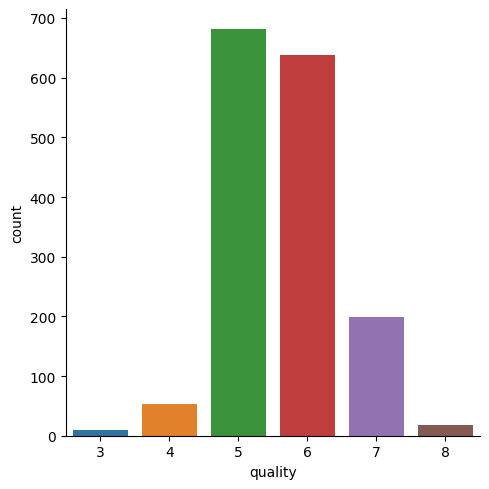

In [6]:
#number of values for each quality
sns.catplot(x="quality",data=df,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

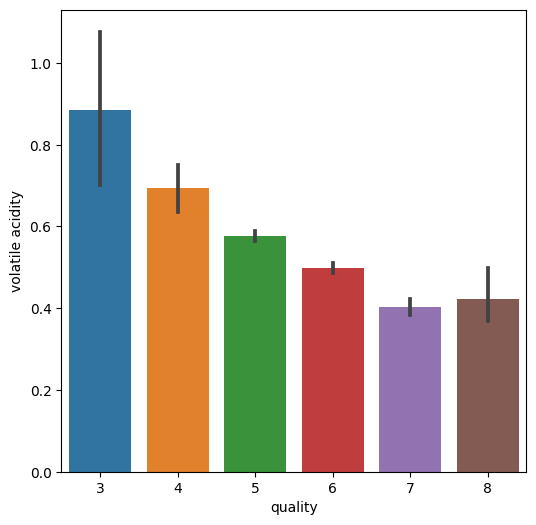

In [7]:
#volatile acidity vs quality
plot=plt.figure(figsize=(6,6))
sns.barplot(x="quality",y="volatile acidity",data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

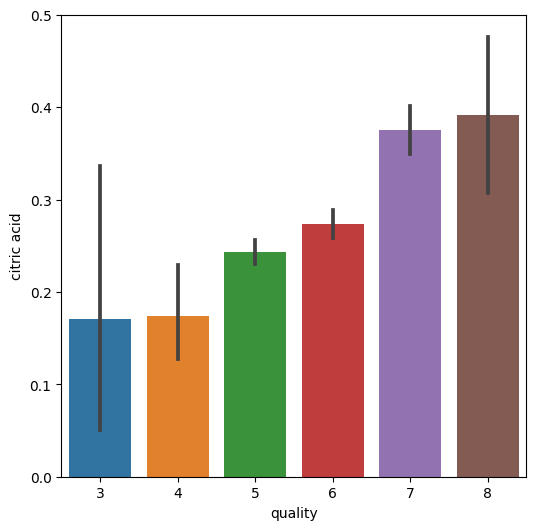

In [8]:
# citric acid vs quality
plot=plt.figure(figsize=(6,6))
sns.barplot(x="quality",y="citric acid",data=df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

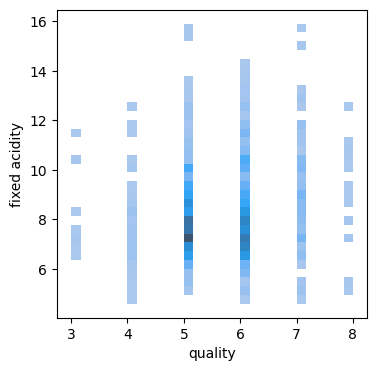

In [9]:
#fixed acidity vs quality
plot=plt.figure(figsize=(4,4))
sns.histplot(x="quality",y="fixed acidity",data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

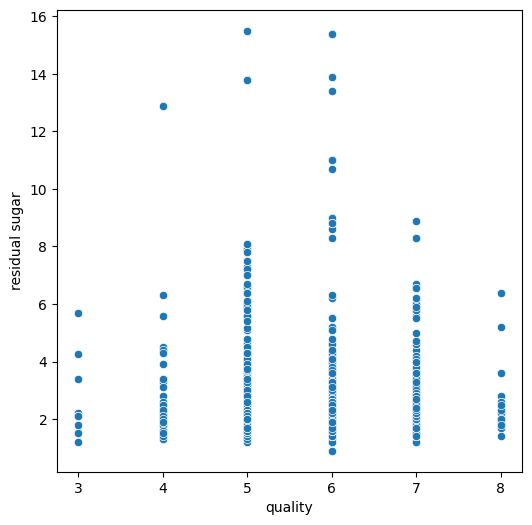

In [10]:
#residual sugar vs quality
plot=plt.figure(figsize=(6,6))
sns.scatterplot(x="quality",y="residual sugar",data=df)

C:\Users\SHAHID\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


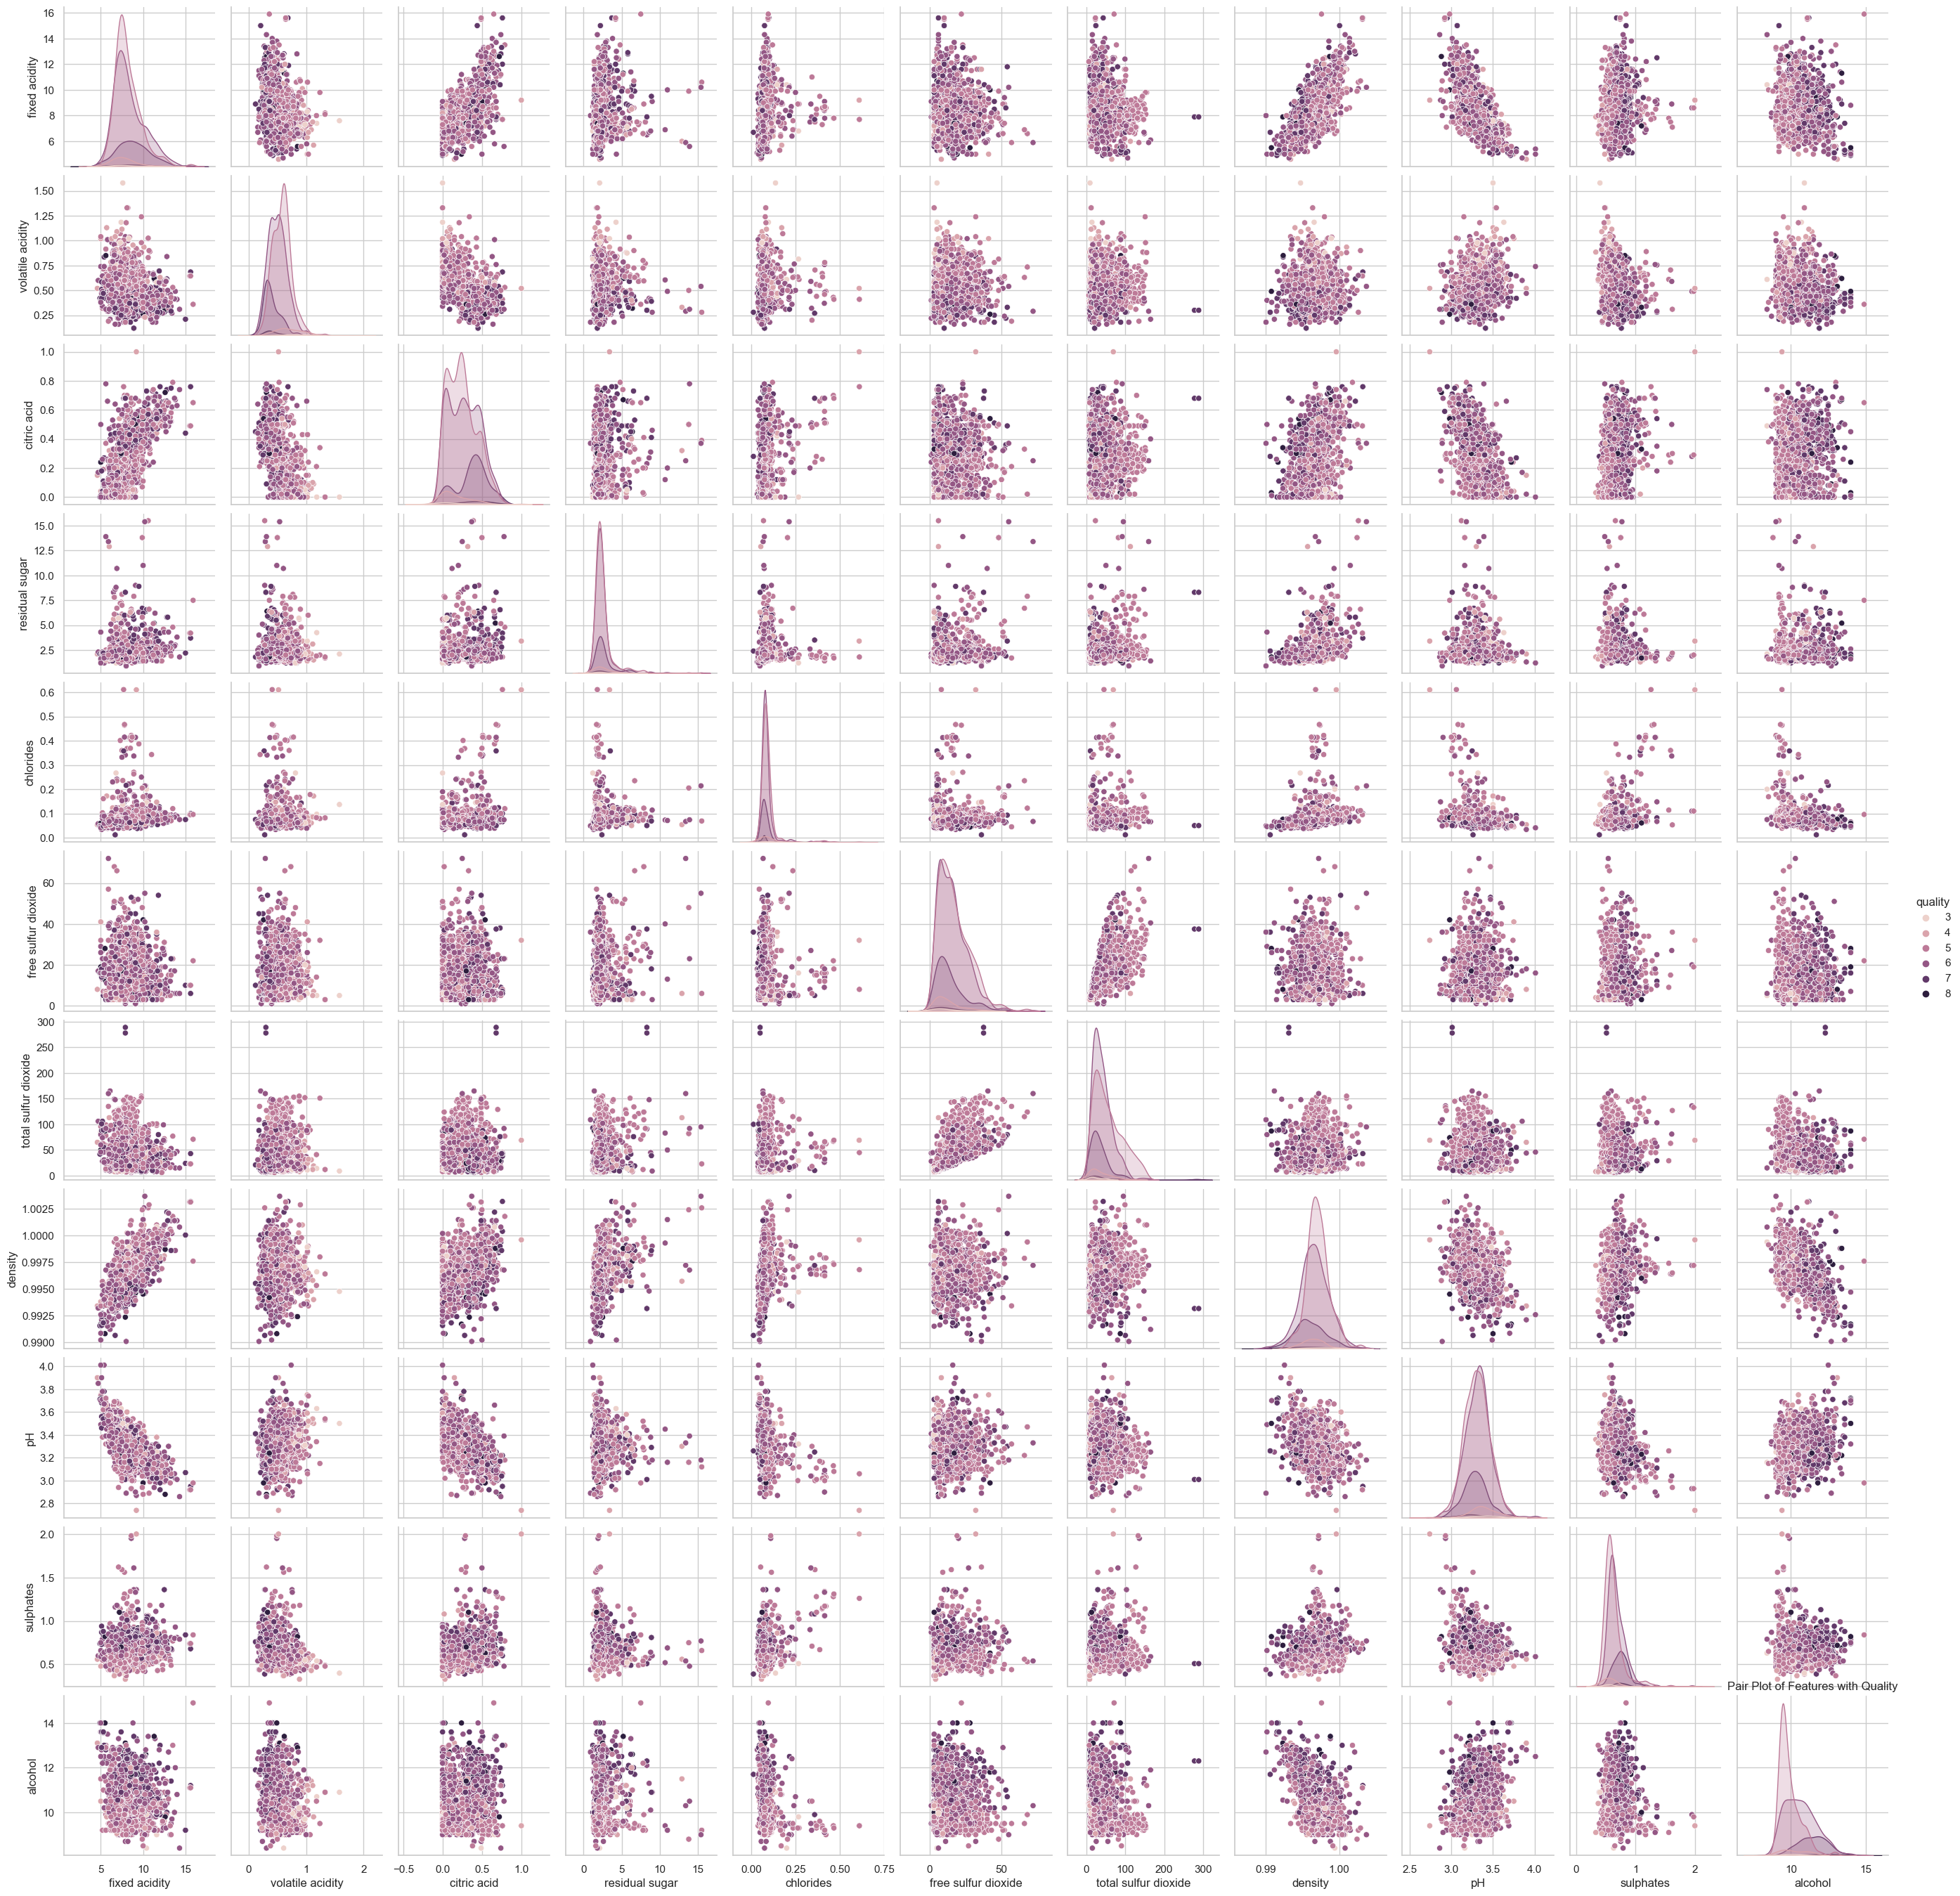

In [11]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create pair plot
sns.pairplot(df, hue="quality", diag_kind="kde")
plt.title("Pair Plot of Features with Quality")
plt.show()


**CORRELATION BETWEEN THE DATA**

In [12]:
correlation=df.corr()

<Axes: >

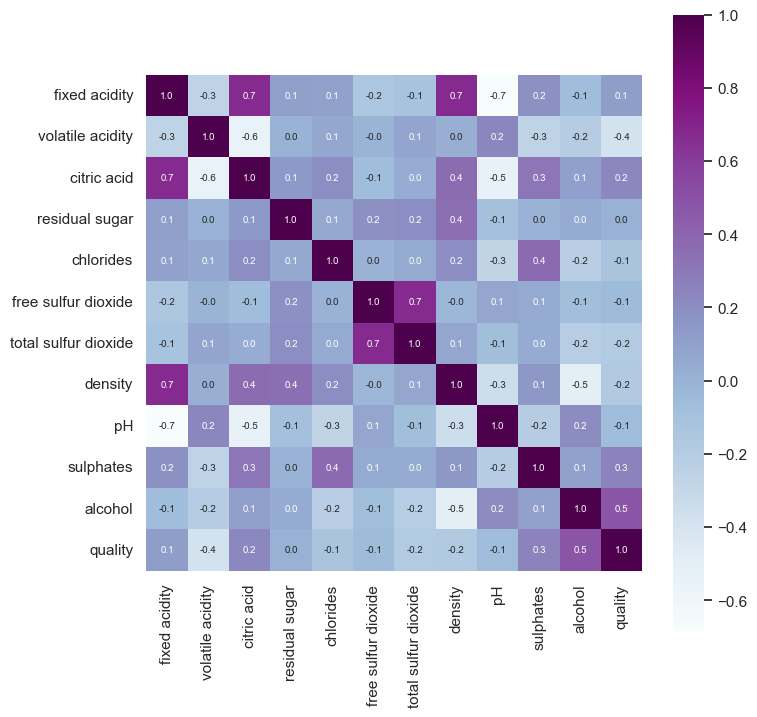

In [13]:
#heat map to understand the columns
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,
            annot_kws={'size':7},cmap='BuPu')

**DATA PREPROCESSING**

In [14]:
#SEPERATE THE DATA AND LABEL
X=df.drop("quality",axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**LABEL BINARIZATION**

In [15]:
#binarize the quality into two label values
Y=df["quality"].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


**TRAINING AND TESTING SPLIT**

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


**LOGISTIC REGRESSION**

In [18]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='newton-cg')

In [19]:
lr_model.fit(X_train,Y_train)

LogisticRegression(solver='newton-cg')

In [20]:
lr_model.score(X_test,Y_test)

0.8875

In [21]:
y_lr_pred=lr_model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       279
           1       0.61      0.34      0.44        41

    accuracy                           0.89       320
   macro avg       0.76      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320



In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_lr_pred))

[[270   9]
 [ 27  14]]


**RANDOM FOREST CLASSIFIER**

In [24]:
model=RandomForestClassifier()

In [25]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [26]:
#Accuracy score on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)


In [27]:
print("Accuracy:",test_data_accuracy)

Accuracy: 0.921875


In [28]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       279
           1       0.70      0.68      0.69        41

    accuracy                           0.92       320
   macro avg       0.83      0.82      0.82       320
weighted avg       0.92      0.92      0.92       320



In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,X_test_prediction))

[[267  12]
 [ 13  28]]


**AdaBoost Classifier**

In [30]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [31]:
abc.fit(X_train,Y_train)

AdaBoostClassifier()

In [32]:
y_abc_pred=abc.predict(X_test)

In [33]:
abc.score(X_test,Y_test)

0.89375

In [34]:
print(classification_report(Y_test,y_abc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       279
           1       0.59      0.56      0.57        41

    accuracy                           0.89       320
   macro avg       0.76      0.75      0.76       320
weighted avg       0.89      0.89      0.89       320



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_abc_pred))

[[263  16]
 [ 18  23]]


**MODEL EVALUATION**

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost')

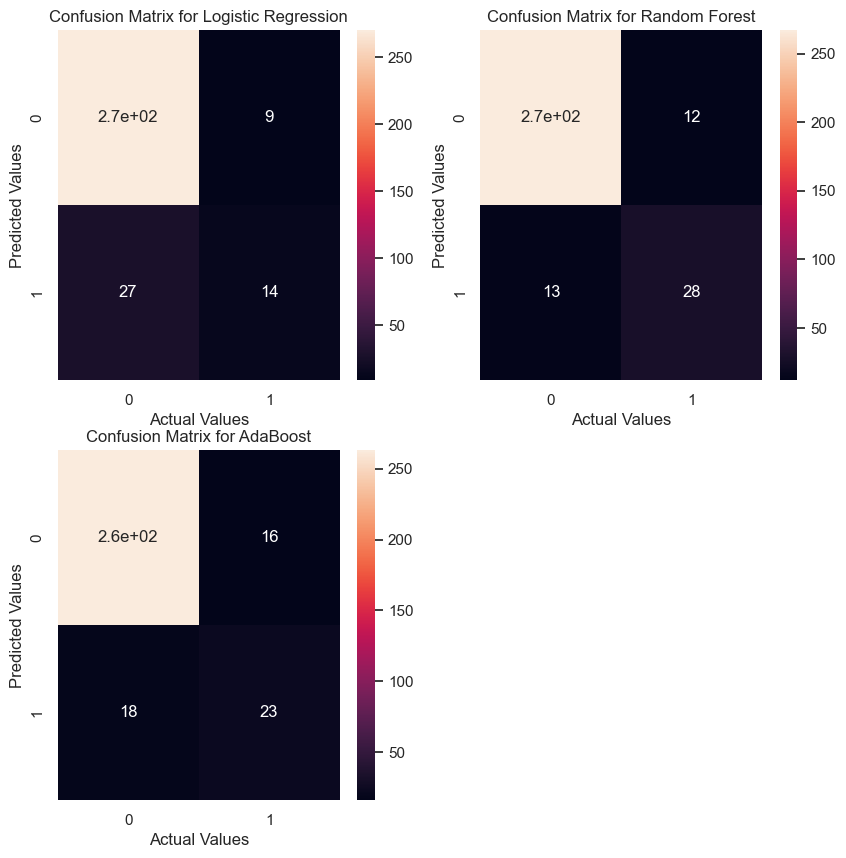

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(Y_test,y_lr_pred),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Random Forest')
plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(Y_test,y_abc_pred),annot=True)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for AdaBoost')

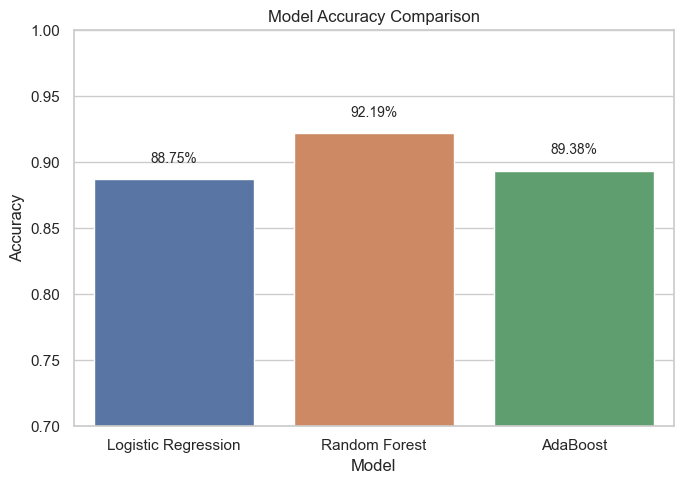

In [37]:
#model accuracy comparison
from sklearn.metrics import accuracy_score
models = ['Logistic Regression', 'Random Forest', 'AdaBoost']
accuracy = [accuracy_score(Y_test, y_lr_pred), accuracy_score(Y_test, X_test_prediction), accuracy_score(Y_test,y_abc_pred)]

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=models, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)

# Add percentage values on top of bars
for i, acc in enumerate(accuracy):
    ax.text(i, acc + 0.01, f'{acc:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Random Forest is getting us the maximum accuracy i.e. 92.19 %

**BUILDING A PREDICTIVE SYSTEM**

In [38]:
input_data= (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
# changing the input data through a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting the label for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==1):
  print("Good quality wine")
else:
  print("Bad quality wine")

[1]
Good quality wine


C:\Users\SHAHID\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
